# Análisis exploratorio de las publicaciones con descuento

In [1]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Load dataset
items = pd.read_csv("../data/preprocessed/items_merged.txt")

In [3]:
# Eliminate items without discount
items = items[~items.original_price.isnull()] 

In [4]:
print(items.shape) # Number of rows and columns
print(len(items.parent_category.unique())) # Number of categories

(287, 115)
25


_**El dataset a utilizar cuenta con 287 ítems publicados con descuento, abarcando 25 categorías de productos.**_

In [5]:
# Add discount and discount_percentage fields
items["discount"] = items.original_price - items.price
items["discount_percentage"] = items.discount/items.original_price

In [6]:
print(items.discount.describe()) # Describe discount
print(items.discount_percentage.describe()) # Describe discount percentage

count      287.000000
mean      1841.311986
std       4420.274249
min          1.950000
25%        177.500000
50%        541.000000
75%       1300.500000
max      30600.000000
Name: discount, dtype: float64
count    287.000000
mean       0.201529
std        0.132912
min        0.050000
25%        0.094419
50%        0.170000
75%        0.294350
max        0.684474
Name: discount_percentage, dtype: float64


_**Resumen estadístico de la variable descuento:<br>
<br>
count:      287.000000<br>
mean:      1841.311986<br>
std:       4420.274249<br>
min:          1.950000<br>
25%:        177.500000<br>
50%:        541.000000<br>
75%:       1300.500000<br>
max:      30600.000000<br>
<br>
Resumen estadístico de la variable porcentaje de descuento:<br>
<br>
count:    287.000000<br>
mean:       0.201529<br>
std:        0.132912<br>
min:        0.050000<br>
25%:        0.094419<br>
50%:        0.170000<br>
75%:        0.294350<br>
max:        0.684474<br>**_

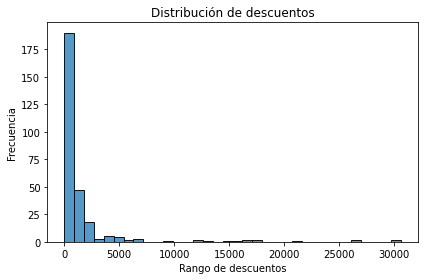

In [9]:
# Discount histogram
chart = sns.histplot(
    data=items.discount,
    binwidth=900
)
chart.set(
    xlabel ="Rango de descuentos",
    ylabel = "Frecuencia",
    title ='Distribución de descuentos')

plt.tight_layout()
plt.savefig('../images/distribucion_de_descuentos.png')

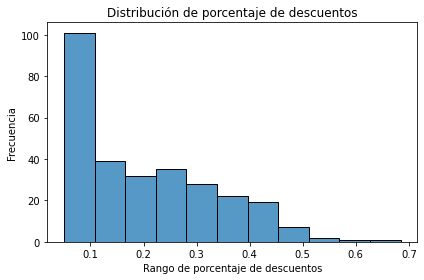

In [10]:
# Discount percentage histogram
chart = sns.histplot(
    data=items.discount_percentage,
)
chart.set(
    xlabel ="Rango de porcentaje de descuentos",
    ylabel = "Frecuencia",
    title ='Distribución de porcentaje de descuentos'
)

plt.tight_layout()
plt.savefig('../images/distribucion_porcentaje_de_descuentos.png')

![title](../images/distribucion_de_descuentos.png)
![title](../images/distribucion_porcentaje_de_descuentos.png)

_**Los valores máximos y medios de descuento y porcentaje de descuento son de 30600 ARS y 68%, y de 1841 ARS y 20%, respectivamente. Los valores mínimos de descuento y porcentaje de descuento son de ARS 1,95 y 5%, respectivamente. Las distribuciones de ambas variables presentan una asimetría con cola hacia la derecha, lo cual indica una mayor presencia de valores relativamente bajos. Esto implica que la mediana sea inferior a la media en ambos casos, con un valor de 541 ARS para el descuento y de 17% para el porcentaje de descuento.**_ 

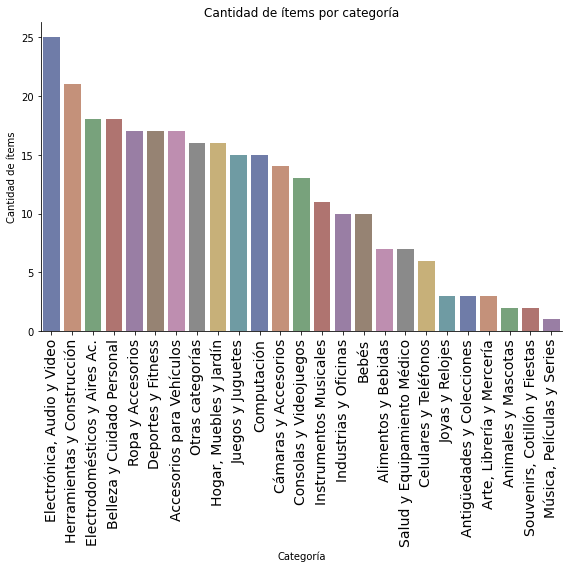

In [11]:
# Amount of discounted items discount per category
aux = items.groupby("parent_category_name", as_index=False).count()[[
    "parent_category_name", 
    "id"
]].sort_values(by="id", ascending=False)

chart = sns.catplot(
    data=aux, kind="bar",
    x="parent_category_name", y="id",
    ci="sd", palette="dark", alpha=.6, height=8
)
chart.set_xticklabels(aux.parent_category_name, fontsize=14, rotation=90)
chart.set(xlabel ="Categoría", 
          ylabel = "Cantidad de ítems", 
          title ='Cantidad de ítems por categoría')

plt.tight_layout()
plt.savefig('../images/cantidad_de_items_por_categoria.png')

![title](../images/cantidad_de_items_por_categoria.png)

_**Los rubros con mayor cantidad de productos con descuento son:<br>
<br>
1) Electrónica, Audio y Video con 25 unidades<br>
2) Herramientas y Construcción con 21 unidades<br>
3) Electrodomésticos y Aires Acondicionados; y Belleza y Cuidado Personal con 18 unidades<br>
4) Ropa y Accesorios; Deporte y Fitness; y Accesorios para Vehículos con 17 unidades<br>
5) Hogar, Muebles y Jardín con 16 unidades**_ 

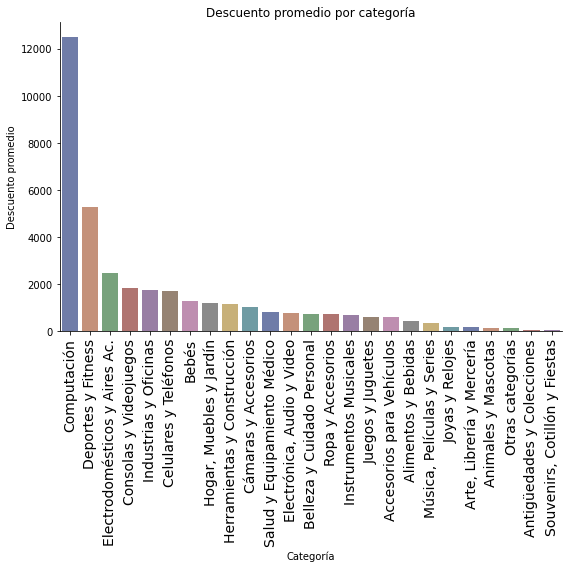

In [12]:
# Average discount per category
aux = items.groupby("parent_category_name", as_index=False).mean()[[
    "parent_category_name", 
    "discount"
]].sort_values(by="discount", ascending=False)

chart = sns.catplot(
    data=aux, kind="bar",
    x="parent_category_name", y="discount",
    ci="sd", palette="dark", alpha=.6, height=8
)
chart.set_xticklabels(
    aux.parent_category_name,
    fontsize=14,
    rotation=90
)
chart.set(
    xlabel ="Categoría",
    ylabel = "Descuento promedio",
    title ='Descuento promedio por categoría')

plt.tight_layout()
plt.savefig('../images/descuento_promedio_por_categoría_.png')

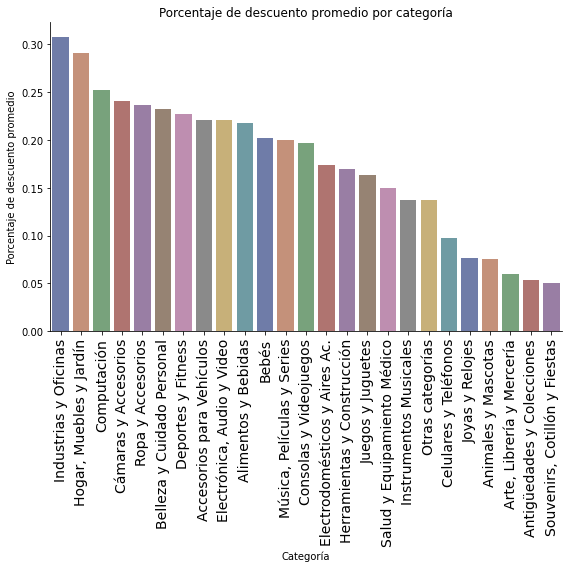

In [13]:
# Average discount percentage per category
aux = items.groupby("parent_category_name", as_index=False).mean()[[
    "parent_category_name", 
    "discount_percentage"
]].sort_values(by="discount_percentage", ascending=False)

chart = sns.catplot(
    data=aux, kind="bar",
    x="parent_category_name", y="discount_percentage",
    ci="sd", palette="dark", alpha=.6, height=8
)
chart.set_xticklabels(aux.parent_category_name, fontsize=14, rotation=90)
chart.set(xlabel ="Categoría", 
          ylabel = "Porcentaje de descuento promedio", 
          title ='Porcentaje de descuento promedio por categoría')

plt.tight_layout()
plt.savefig('../images/porcentaje_de_descuento_promedio_por_categoría.png')

![title](../images/descuento_promedio_por_categoría_.png)
![title](../images/porcentaje_de_descuento_promedio_por_categoría.png)


_**Sin embargo, el rubro con el mayor descuento promedio es Computación, con un valor de 12500 ARS. Este rubro también se encuentra entre aquellos mejor posicionados en relación al descuento porcentual, ubicándose en 3er lugar con un valor del 25%. Otros rubros a destacar por sus descuentos en valores absolutos son Deportes y Fitness, y Electrodomésticos y Aires Acondicionados, con 5200 ARS y 2500 ARS respectivamente. El top 3 de descuentos porcentuales lo completan en primer lugar Industrias y Oficinas, con un descuento promedio del 31%, y en segundo lugar Hogar, Muebles y Jardín, con un valor de 29%.**_  

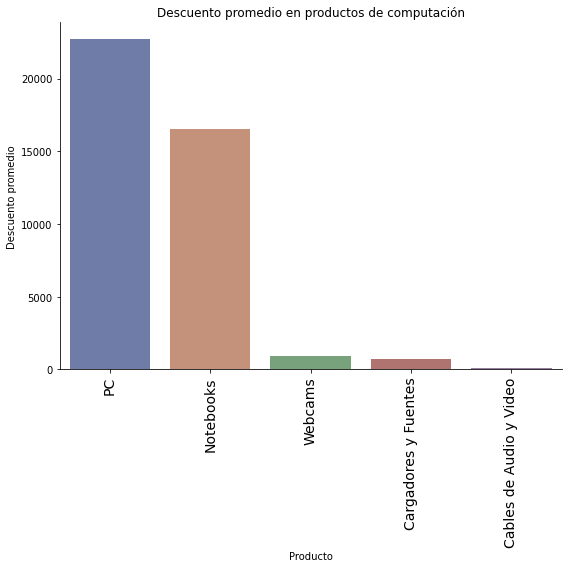

In [14]:
# Average discount in computing items
aux = items.groupby(["parent_category_name", "category_name"], as_index=False).mean()[[
    "parent_category_name",
    "category_name", 
    "discount"
]].sort_values(by="discount", ascending=False)
aux = aux[aux.parent_category_name == "Computación"]

chart = sns.catplot(
    data=aux, kind="bar",
    x="category_name", y="discount",
    ci="sd", palette="dark", alpha=.6, height=8
)
chart.set_xticklabels(aux.category_name, fontsize=14, rotation=90)
chart.set(xlabel ="Producto", 
          ylabel = "Descuento promedio", 
          title ='Descuento promedio en productos de computación')

plt.tight_layout()
plt.savefig('../images/Descuento_promedio_en_productos_de_computacion.png')

![title](../images/Descuento_promedio_en_productos_de_computacion.png)

_**Dado el especial interés que tiene el rubro Computación, se realiza un análisis pormenorizado de los productos del mismo. A partir de éste, se puede ver que los drivers del descuento en la categoría están dados por los descuentos de los productos PC y Notebooks, con valores promedios de 22700 ARS y 16500 ARS respectivamente.**_

In [15]:
# Correlation analysis
discount_correlation = items.corr().discount.sort_values(ascending=False)
discount_correlation = discount_correlation[~discount_correlation.isnull()]
print(discount_correlation[1:6])
print(discount_correlation[-5:])

original_price         0.919115
price                  0.866986
base_price             0.866986
installments_amount    0.708722
health                 0.437770
Name: discount, dtype: float64
use_thumbnail_id                                         -0.138668
seller_seller_reputation_transactions_ratings_positive   -0.186069
seller_eshop_seller                                      -0.188508
seller_eshop_eshop_id                                    -0.310226
installments_rate                                        -0.356561
Name: discount, dtype: float64


_**Finalmente, se hace un análisis de la correlación entre el descuento en productos y las variables continuas del dataset.<br>
<br>
Top 5 de variables positivamente correlacionadas:<br>
<br>
1) original_price:         0.919115<br>
2) price:                  0.866986<br>
3) base_price:             0.866986<br>
4) installments_amount:    0.708722<br>
5) health:                 0.437770<br>
<br>
Top 5 de variables negativamente correlacionadas:<br>
<br>
1) installments_rate:                                        -0.356561<br>
2) seller_eshop_eshop_id:                                    -0.310226<br>
3) seller_eshop_seller:                                      -0.188508<br>
4) seller_seller_reputation_transactions_ratings_positive:   -0.186069<br>
5) use_thumbnail_id:                                         -0.138668<br>
<br>
Se observa que sólo 4 variables se encuentran significativamente correlacionadas con el descuento de un producto: el precio original, el precio luego de aplicarse el descuento, el precio base para el caso de las subastas y la cantidad de cuotas.**_